# Data Lab: Classification
14th October 2024

## Recap: Classification evaluation metrics

When calculating metrics for *binary* classification evaluation, we usually think in these terms:
- **TP** = True Positives = Samples we predicted as positive and their actual label is also positive
- **TN** = True Negatives = Samples we predicted as negative and their actual label is also negative
- **FP** = False Positives = Samples we predicted as positive but their actual label is negative
- **FN** = False Negatives = Samples we predicted as negative but their actual label is positive


---

### Accuracy
- **Calculation**:  
    $ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

- **Question it answers**:  
  "How many of the overall predictions are correct?"

- **Purpose & When to Use**:  
  Accuracy is a simple metric that measures the proportion of correct predictions (both positive and negative) over the total number of predictions. It is useful when the classes are balanced (i.e., the number of positive and negative examples is roughly equal). However, it can be misleading in cases where one class dominates. For example, in highly imbalanced datasets, such as rare disease detection, accuracy may give an inflated sense of performance because the model could predict the majority class often and still appear to perform well.

---

###  Precision
- **Calculation**:  
  $ Precision = \frac{TP}{TP + FP} $
  
- **Also called**: Positive Predictive Value (PPV).

- **Question it answers**:  
  "Of the samples that the model predicted as positive, how many are actually positive?"

- **Purpose & When to Use**:  
  Precision measures how often your positive predictions are correct. It is particularly important in scenarios where the cost of false positives is high, such as in spam detection, where incorrectly marking a legitimate email as spam is undesirable. It’s useful when you care more about avoiding false positives rather than false negatives. Precision is often used in conjunction with recall for a more balanced evaluation of a classifier.

---

### Recall
- **Calculation**:  
  $ Recall = \frac{TP}{TP + FN} $
  
- **Also called**: Sensitivity, True Positive Rate (TPR).

- **Question it answers**:  
  "Out of all actual positive cases, how many did the model correctly identify?"

- **Purpose & When to Use**:  
  Recall evaluates the model’s ability to detect positive instances and is crucial when missing positive cases is costly. For instance, in medical diagnostics, a low recall could mean failing to identify patients with a disease (false negatives), which could have severe consequences. It’s a good metric when the focus is on minimizing false negatives. Like precision, recall is typically balanced against other metrics such as precision or specificity.
---

### Specificity
- **Calculation**:  
  $ Specificity = \frac{TN}{TN + FP} $
  
- **Also called**: True Negative Rate (TNR).

- **Question it answers**:  
  "Out of all actual negative cases, how many did the model correctly identify?"

- **Purpose & When to Use**:  
  Specificity measures the proportion of true negatives out of all negative samples. It's important when the cost of false positives is high. For example, in fraud detection, a low specificity could mean many legitimate transactions are incorrectly flagged as fraud, leading to poor user experience. Specificity is crucial when distinguishing between negative classes accurately is important. It is often used in tandem with sensitivity, particularly when you want to avoid false positives as much as false negatives.

---

### F1 Score
- **Calculation**:  
  $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
  
- **Also called**: F-measure or F-score.

- **Question it answers**:  
  "What is the harmonic mean of precision and recall, giving a balance between the two?"

- **Purpose & When to Use**:  
  The F1 score combines both precision and recall into a single metric by calculating their harmonic mean. It’s particularly useful when there is an uneven class distribution or when you need a balance between false positives and false negatives. It is often preferred over accuracy when the dataset is imbalanced because it equally weighs both precision and recall, thus providing a more nuanced evaluation of the model’s performance. If you care equally about false positives and false negatives, the F1 score is often the go-to metric.

---

### Summary of Use Cases:

- **Accuracy**: Best when class distribution is balanced and overall correctness is the goal.
- **Precision**: Focus on avoiding false positives; used when the cost of a false positive is high.
- **Recall (Sensitivity)**: Focus on avoiding false negatives; used when the cost of missing a positive case is high.
- **Specificity**: Used when it’s important to correctly classify negative cases and avoid false positives.
- **F1 Score**: Used when precision and recall are both important and when there is class imbalance.


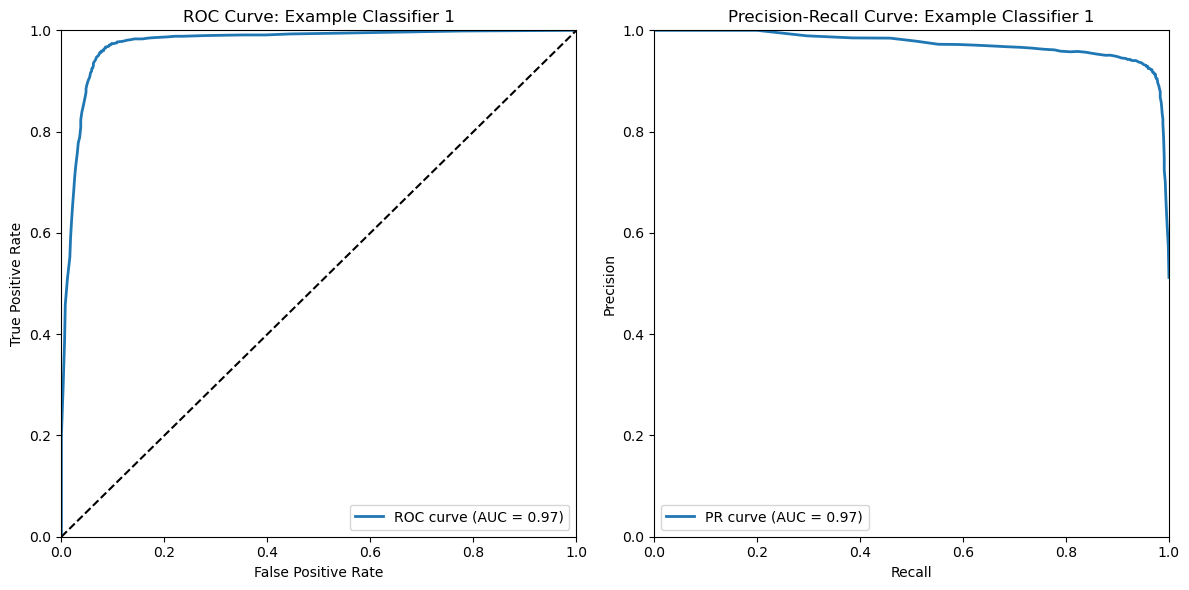

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from collections import Counter

# Function to plot class distributions
def plot_class_distribution(y, title):
    counter = Counter(y)
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    plt.show()

# Function to plot ROC and PR curves
def plot_curves(y_true, y_scores, title):
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.legend(loc='lower right')

    # PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = average_precision_score(y_true, y_scores)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title(f'Precision-Recall Curve: {title}')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Parameters
n_samples = 10000  # Number of samples
n_features = 10   # Number of features

# Generate balanced dataset
X_balanced, y_balanced = make_classification(n_samples=n_samples, n_features=n_features, 
                                             n_informative=2, n_redundant=1, 
                                             n_classes=2, weights=[0.5, 0.5], 
                                             flip_y=0, random_state=42)

# Generate imbalanced dataset
X_imbalanced, y_imbalanced = make_classification(n_samples=n_samples, n_features=n_features, 
                                                 n_informative=2, n_redundant=1, 
                                                 n_classes=2, weights=[0.99, 0.01], 
                                                 flip_y=0, random_state=42)

# Split datasets into training and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced, y_imbalanced, test_size=0.3, random_state=42)

# Train RandomForestClassifier on balanced dataset
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Predict probabilities for balanced dataset
y_scores_balanced = clf_balanced.predict_proba(X_test_balanced)[:, 1]

# Calculate ROC and PR AUC for balanced dataset
plot_curves(y_test_balanced, y_scores_balanced, 'Example Classifier 1')

# Train RandomForestClassifier on imbalanced dataset
clf_imbalanced = RandomForestClassifier(random_state=42)
clf_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)

# Predict probabilities for imbalanced dataset
y_scores_imbalanced = clf_imbalanced.predict_proba(X_test_imbalanced)[:, 1]

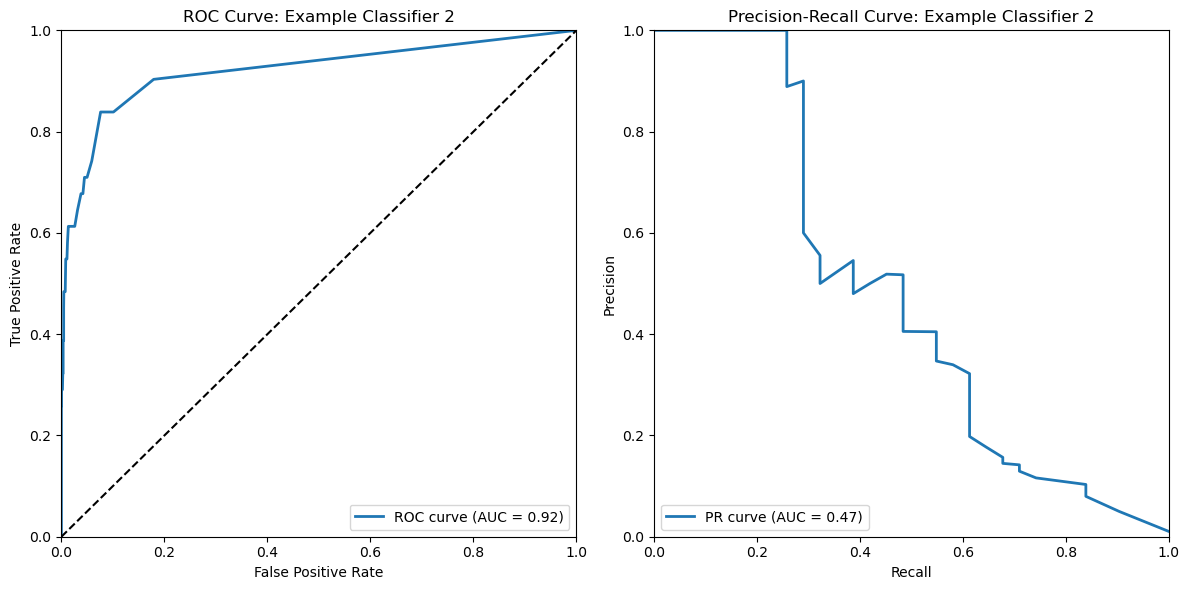

In [56]:

# Calculate ROC and PR AUC for imbalanced dataset
plot_curves(y_test_imbalanced, y_scores_imbalanced, 'Example Classifier 2')

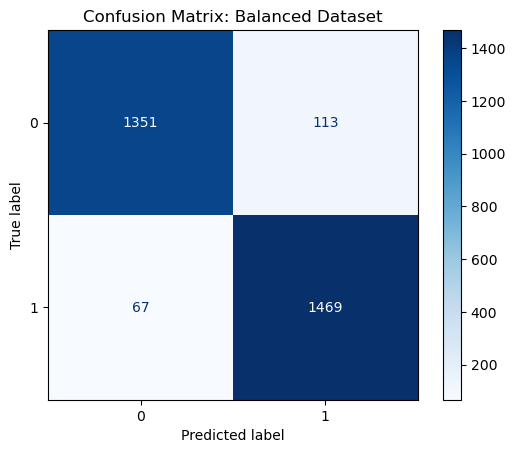

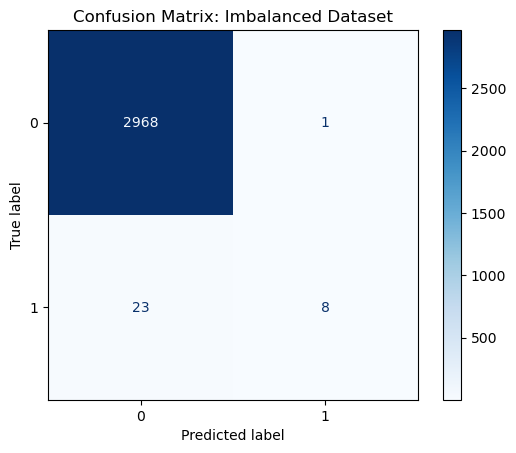

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Balanced Dataset
cm_balanced = confusion_matrix(y_test_balanced, clf_balanced.predict(X_test_balanced))
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=[0, 1])
disp_balanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Balanced Dataset')
plt.show()

# Confusion Matrix for Imbalanced Dataset
cm_imbalanced = confusion_matrix(y_test_imbalanced, clf_imbalanced.predict(X_test_imbalanced))
disp_imbalanced = ConfusionMatrixDisplay(confusion_matrix=cm_imbalanced, display_labels=[0, 1])
disp_imbalanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Imbalanced Dataset')
plt.show()


---
## Recap: classification models
You learned about the following models:
- logistic regression
- Decision Tree
- Random Forest
- Support Vector Machines (SVMs)

Lets apply them to some simulated datasets to learn about their characteristics!

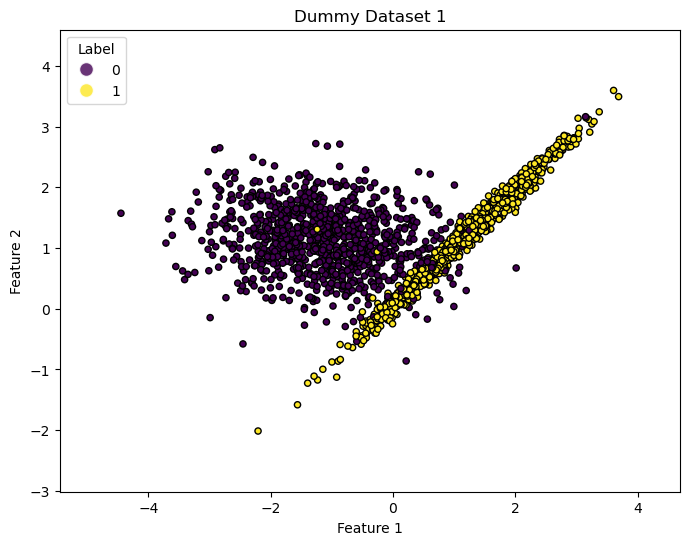

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles

# Function to visualize the whole dataset
def visualize_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    
    # Get unique classes and corresponding colors from the scatter
    unique_classes = np.unique(y)
    class_colors = {cls: scatter.cmap(scatter.norm(cls)) for cls in unique_classes}
    
    # Create legend manually
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label=cls, 
                   markerfacecolor=class_colors[cls], markersize=10, alpha=0.8) 
        for cls in unique_classes
    ]
    
    plt.legend(handles=handles, title="Label")
    plt.show()

# Dataset 1: Linearly separable 
X1, y1 = make_classification(n_samples=2000, n_features=2, n_informative=2, 
                             n_redundant=0, n_clusters_per_class=1, class_sep=1.15, random_state=42)

# Dataset 2: Non-linear
X2, y2 = make_circles(n_samples=2000, noise=0.2, factor=0.4, random_state=42)

# Visualize Dataset 1
visualize_dataset(X1, y1, title="Dummy Dataset 1")



### Questions: 
What kind of shape would you draw to separate the two classes?

Which one of our classifiers would be appropriate for this dataset? 

What results would you expect when you apply all of them?

#### Decision boundaries (Dummy dataset 1)

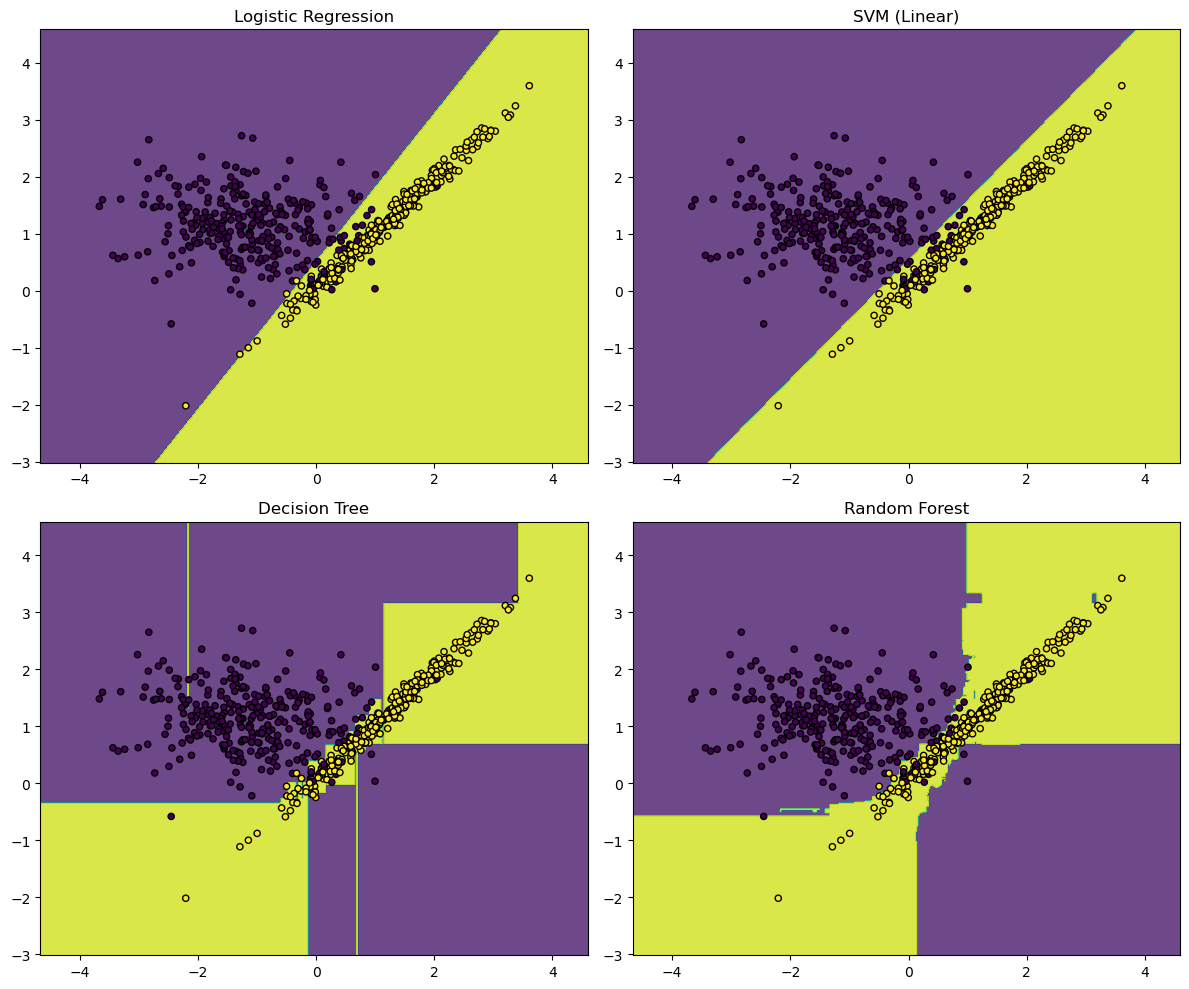

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Helper function to plot decision boundary
def plot_decision_boundary(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    ax.set_title(title)

# Dataset 1: Linearly separable with more noise and more samples
X1, y1 = make_classification(n_samples=2000, n_features=2, n_informative=2, 
                             n_redundant=0, n_clusters_per_class=1, class_sep=1.15, random_state=42)

# Dataset 2: Non-linear with more noise and more samples
X2, y2 = make_circles(n_samples=2000, noise=0.2, factor=0.4, random_state=42)

# Split datasets into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Train classifiers on both datasets
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear)": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Fit models for Dataset 1 (linearly separable)
for name, model in models.items():
    model.fit(X1_train, y1_train)

# Create subplots for Dataset 1
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axs1.flatten(), models.items()):
    plot_decision_boundary(X1_test, y1_test, model, ax, title=f"{name}")

plt.tight_layout()
plt.show()


### Questions:
- How well would you say the models are able to separate the two classes?
- What differences do you observe between the models?

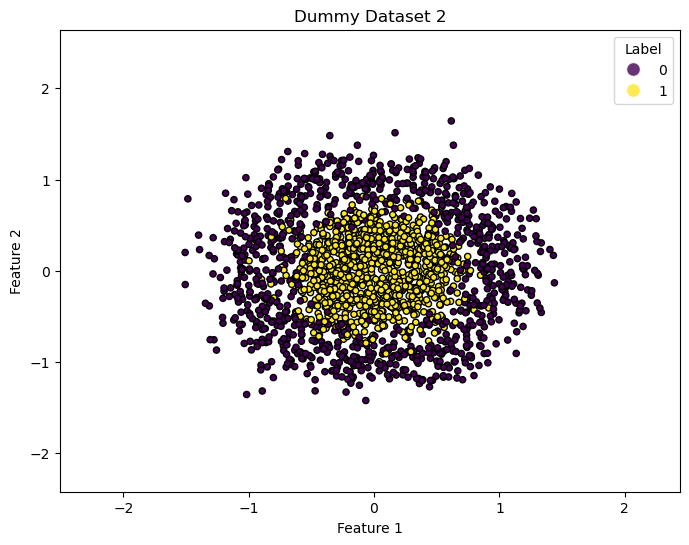

In [47]:
# Visualize Dataset 2
visualize_dataset(X2, y2, title="Dummy Dataset 2")

### Questions: 
What kind of shape would you draw to separate the two classes?

Which one of our classifiers would be appropriate for this dataset? 

What results would you expect when you apply all of them?

#### Decision boundaries (Dummy dataset 2)

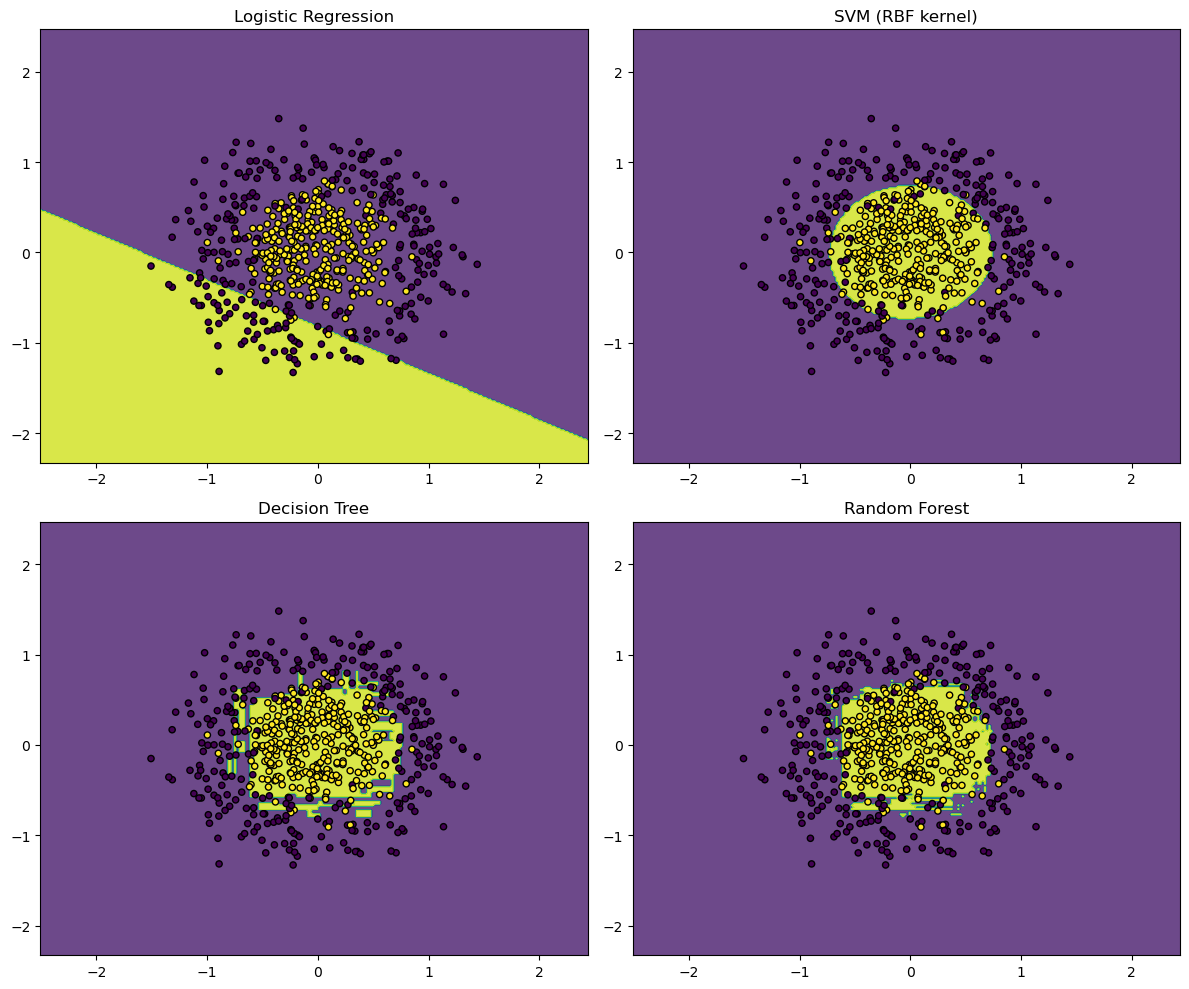

In [39]:
# Train classifiers on both datasets
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF kernel)": SVC(kernel='rbf', gamma='auto'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Fit models for Dataset 2 (non-linear)
for name, model in models.items():
    model.fit(X2_train, y2_train)

# Create subplots for Dataset 2
fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axs2.flatten(), models.items()):
    plot_decision_boundary(X2_test, y2_test, model, ax, title=f"{name}")

plt.tight_layout()
plt.show()


### Questions:
- How well would you say the models are able to separate the two classes?
- What differences do you observe between the models?

## Rules of Thumb for Choosing the Right Algorithm:

1) **Start Simple**: If the relationship between features and the target is expected to be linear, start with Logistic Regression. It’s efficient and interpretable.

2) **When Interpretability Matters**: Use Decision Trees or Logistic Regression if you need a model that can explain its predictions in an intuitive way. Decision Trees are particularly useful when the problem involves complex but interpretable non-linear relationships.

3) **For Non-linear Relationships**: If you know the data has complex non-linear boundaries, consider Random Forests or SVMs with non-linear kernels. Random Forests are easier to use (less sensitive to hyperparameters) and provide feature importance, while SVMs may offer more fine-tuned decision boundaries with proper hyperparameter optimization.

4) **When Overfitting is a Concern**: Random Forests reduce overfitting issues common with Decision Trees and are useful when you need a robust model that generalizes well.

5) **For High-dimensional Data**: SVMs perform exceptionally well with high-dimensional data, especially when the number of features exceeds the number of samples.

6) **For Large Datasets**: If you have a very large dataset, Random Forest will often be the most scalable option, while SVMs may struggle unless you reduce dimensionality or use linear kernels.

By considering the structure of your data and the problem at hand, you can make a more informed choice about which classifier to use.

---

# Exercise
Time to get your hands dirty on an actual classification problem.

### Task 1: Load the data and investigate it
We are working with data on airline passenger satisfaction. Your binary classification model should predict a passenger's `satisfaction`.

Perform an exploratory data analysis (EDA). Produce as few or as many tables and figures as you like.

What kinds of features do you have? How are your features and labels distributed?


In [100]:
# load the data and investigate it
import pandas as pd

passenger_data = pd.read_csv('airline_passenger_satisfaction.csv', index_col=0).reset_index(drop=True)
passenger_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [109]:
import seaborn as sns

print(passenger_data.columns, "\n")
print(f"{passenger_data.shape = }\n")
print(f"% satisfied passengers {round(passenger_data.loc[passenger_data.satisfaction == 'satisfied', 'Gender'].size  / passenger_data.shape[0], 2)}")
print(f"% neutral/dissatisfied passengers {round(passenger_data.loc[passenger_data.satisfaction != 'satisfied', 'Gender'].size / passenger_data.shape[0], 2)}")

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object') 

passenger_data.shape = (25976, 24)

% satisfied passengers 0.44
% neutral/dissatisfied passengers 0.56


Visualize feature distributions in regards to label

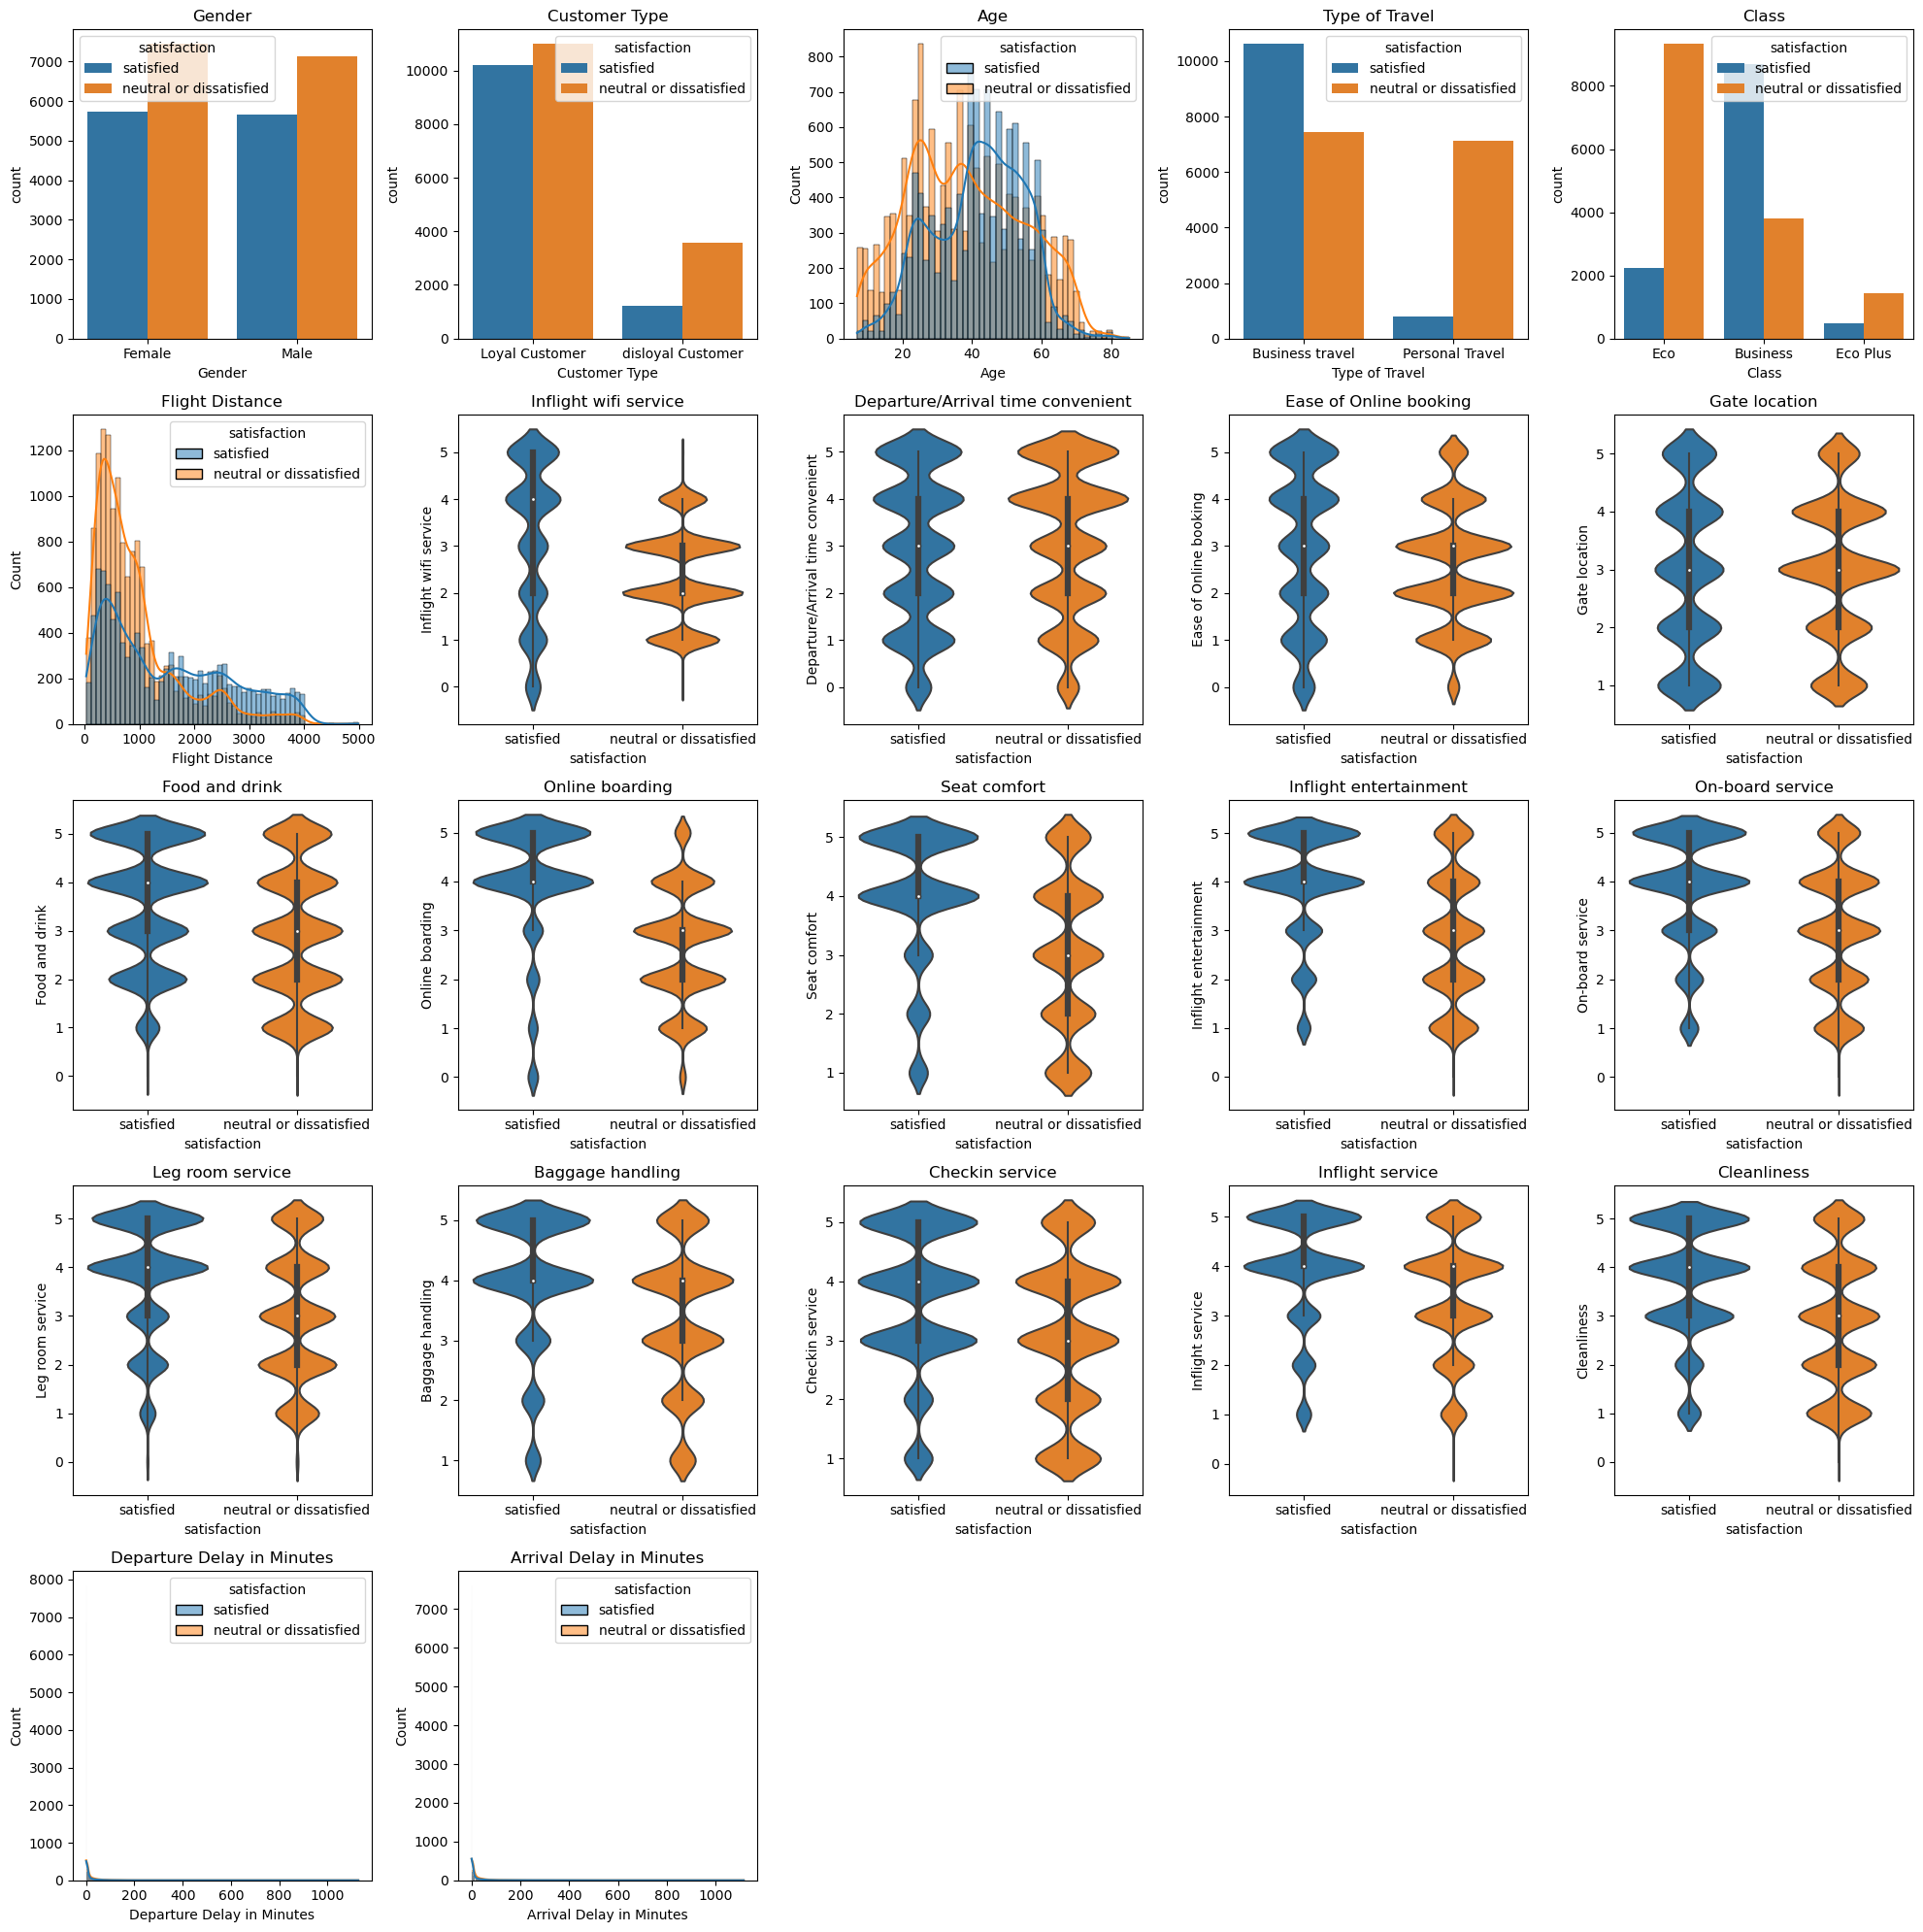

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a pandas DataFrame called df and the class label is 'target'
# Replace 'target' with the actual column name of your class label
# Also assume df.columns is already ordered to separate numerical, ordinal, and nominal features if needed.

# Define the figure and axes for a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

# List of feature names (except the target column)
features = passenger_data.columns.drop('satisfaction')

# Loop over each feature and plot based on its type
for i, feature in enumerate(features):
    if (passenger_data[feature].dtype == 'float64' or passenger_data[feature].dtype == 'int64') and passenger_data[feature].max() > 5:  # Numerical features
        sns.histplot(data=passenger_data, x=feature, hue='satisfaction', kde=True, ax=axes[i])
    elif passenger_data[feature].dtype == 'category' or passenger_data[feature].dtype == 'object':  # Nominal features
        sns.countplot(data=passenger_data, x=feature, hue='satisfaction', ax=axes[i])
    else:  # For ordinal or other types, we can use a boxplot or violinplot
        sns.violinplot(data=passenger_data, x='satisfaction', y=feature, ax=axes[i])

    axes[i].set_title(feature)

# Hide any remaining unused axes in the grid
for j in range(len(features), 25):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlapping of subplots
plt.tight_layout()
plt.show()


Plots of delay features look a bit weird, so we're re-doing them separately.

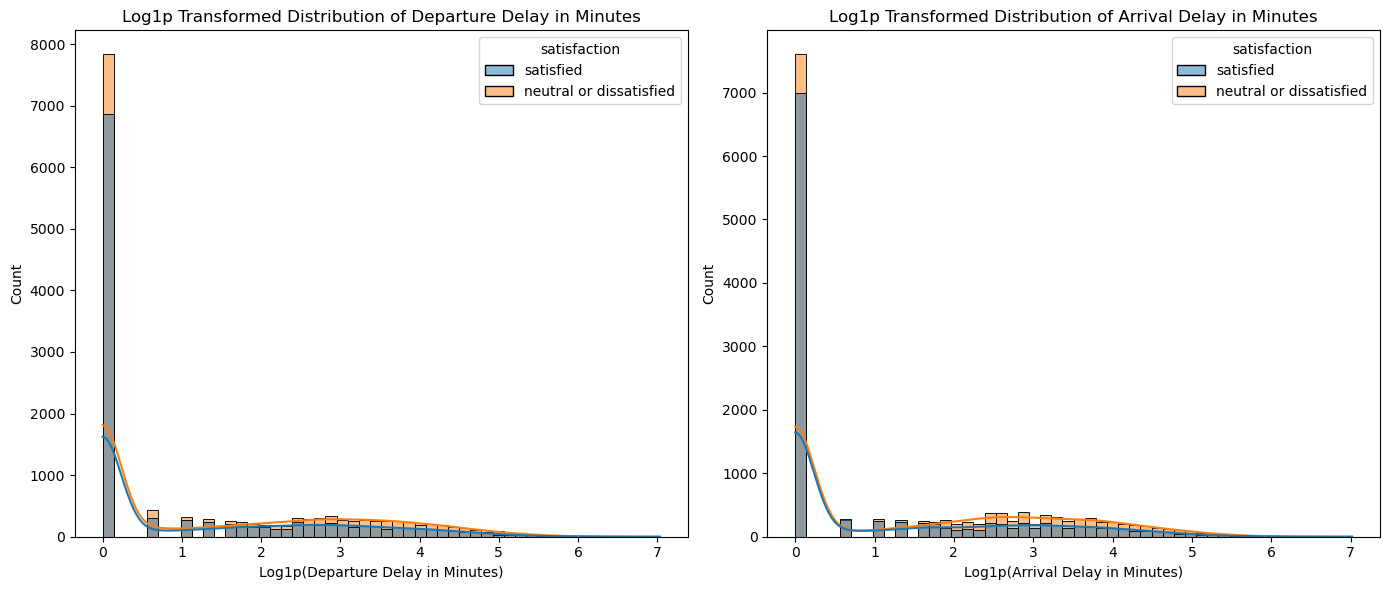

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'skewed_feature' is the name of your skewed numerical column and 'target' is the class label column
skewed_features = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = 'satisfaction'


# Create a figure with two subplots: original and transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for skewed_feature, ax in zip(skewed_features, axes):
    # Log1p transformation (log(1 + x) to handle zero values)
    passenger_data[f'log1p_{skewed_feature}'] = np.log1p(passenger_data[skewed_feature])

    # Plot transformed data distribution with Seaborn, colored by class label
    sns.histplot(data=passenger_data, x=f'log1p_{skewed_feature}', hue=target, kde=True, bins=50, ax=ax)
    ax.set_title(f'Log1p Transformed Distribution of {skewed_feature}')
    ax.set_xlabel(f'Log1p({skewed_feature})')
    ax.set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


Oddly, there doesn't really seem to be an effect of delays on passenger satisfaction. I would probably leave these features out then, as they might distort the feature scaling.

### Task 2: Prepare the labels and split into train & test sets

In [112]:
from sklearn.model_selection import train_test_split

# create a binary label column, discard the original label column
passenger_data["label"] = 0
passenger_data.loc[passenger_data.satisfaction == "satisfied", "label"] = 1 # or the other way around?

y = passenger_data.label.copy()
X = passenger_data.iloc[:, 1:-4].copy()

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

### Task 3: Preprocess the features
- Find out which features are numerical and which are categorical (ordinal & nominal)
- assign features to lists `numerical_features` and `nominal_features`
- Depending on which classifier you want to use, proceed differently with *ordinal* features:
     - for logistic regression & SVM: scale ordinal features like numeric features
     - for tree-based classifiers: no need to scale or encode them

In [113]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Assign the numerical and categorical (nominal) columns
nominal_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
#numerical_features = ['Age', 'Flight distance'] # for tree-based methods
numerical_features = [col for col in X.columns.tolist() if col not in nominal_features]  # for linear methods

# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), nominal_features)
    ])

**Bonus question**: Why did we split the data before running our preprocessing pipeline?

### Task 4: Pick a classifier and apply it
You might want to look up the appropriate command on the [scikit-learn website](https://scikit-learn.org/stable/api/index.html). Maybe your chosen classifier has some important arguments you can pass?

In [117]:
from sklearn.linear_model import LogisticRegression

# Now, the pipeline applies the appropriate transformations
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fit your pipeline on the training data
pipeline.fit(X_train, y_train)

# Apply your pipeline to the test set
y_pred = pipeline.predict(X_test)

### Task 5: Evaluate your classifier & interpret the results
Pick metrics and visualizations you deem useful.

In [141]:
# calculate metrics & create visualizations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"precision: {precision_score(y_test, y_pred):.2f}")
print(f"recall: {recall_score(y_test, y_pred):.2f}")
print(f"f1: {f1_score(y_test, y_pred):.2f}")

accuracy: 0.87
precision: 0.87
recall: 0.83
f1: 0.85


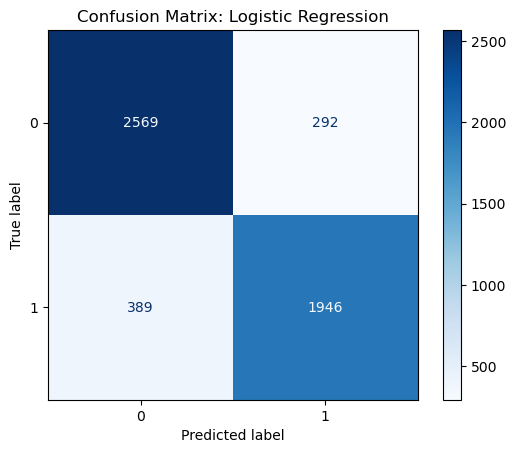

In [123]:
cm_imbalanced = confusion_matrix(y_test,  pipeline.predict(X_test))
disp_imbalanced = ConfusionMatrixDisplay(confusion_matrix=cm_imbalanced, display_labels=[0, 1])
disp_imbalanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Logistic Regression')
plt.show()


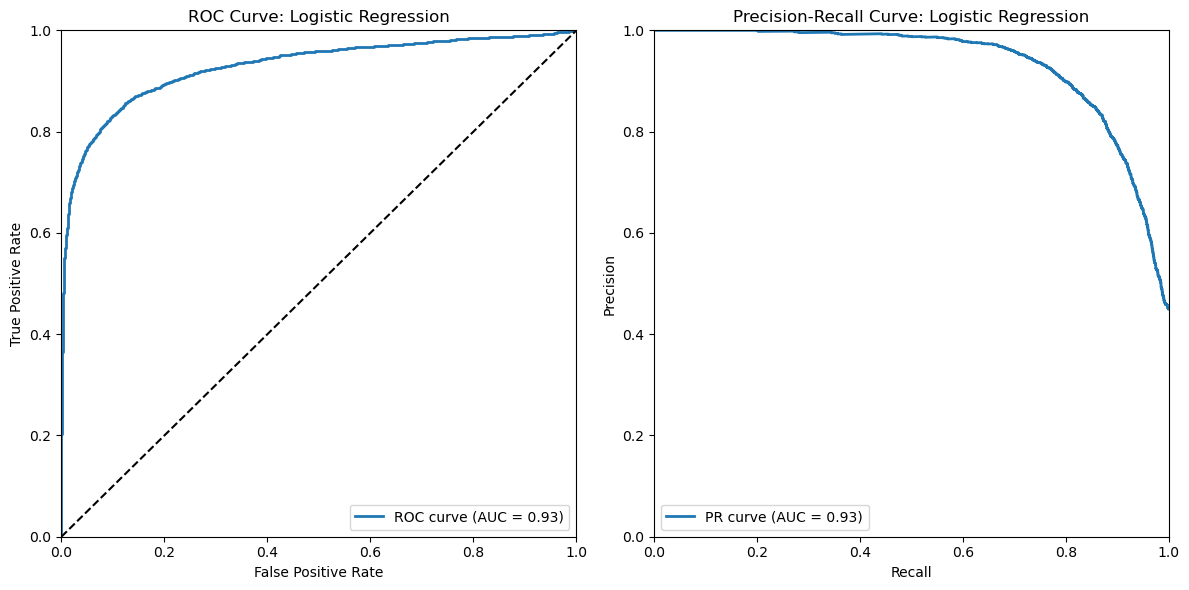

In [122]:
# Predict probabilities for balanced dataset
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC and PR AUC for balanced dataset
plot_curves(y_test, y_scores, 'Logistic Regression')

What is your interpretation of the results of your classifier?